In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#time so far 8hr

#I will not discuss scope

System version when preparing this notebook
- python 3.8.11
- padas 1.1.3
- numpy 1.20.3
- Seaborn 0.11.1
- netCDF 1.5.3
- xarray 0.19.0
- cartopy 0.18.0

This lesson was prepared by Maria D Hernandez Limon for NRT Environment Science Bootcamps 2021.

# Overview

Today we will give an introduction to the bread and butter of object oriented programming (of which Python is an example) -- classes! 
These are the most versatile of the objects we've encountered before, and hopefully after today you'll recognize classes in many of the things we've already learned.

### Goals for the day:

- Understand objects as things with attributes
    - Getters
    - Setters
- Recognize the utility of objects for storing information
- Use `self`
    
__Concepts learned:__

- objects and attributes
- `class`
    - `__init__`
    - `function(self, ...)`
    - `self.(...)`


# 1. What's in an ~~name~~ object?

Everything in python is an object. This includes functions, lists, numpy arrays, and classes.
Objects have attributes, and they are referenced with a `.` as `object.attribute`. Here are some examples of objects and attributes.

| Object | Attribute | Attribute reference |
| --- | --- | --- |
| list `L` | append function | `L.append()` |
| float number `x` | is_integer function | `x.is_integer()` |
| numpy array `N` | shape | `N.shape` |
| matplotlib axis `ax` | plot function | `ax.plot(...)` |

Both functions (methods) and other objects can be attributes. You can tell them from each other based on whether or not they have parentheses.

#### From the python docs (https://docs.python.org/3/tutorial/classes.html)
Classes provide a means of bundling data and functionality together. Creating a new class creates a new __type__ of object, allowing new __instances__ of that type to be made. Each class instance can have __attributes__ attached to it for maintaining its state. Class instances can also have __methods__ (defined by its class) for modifying its state.

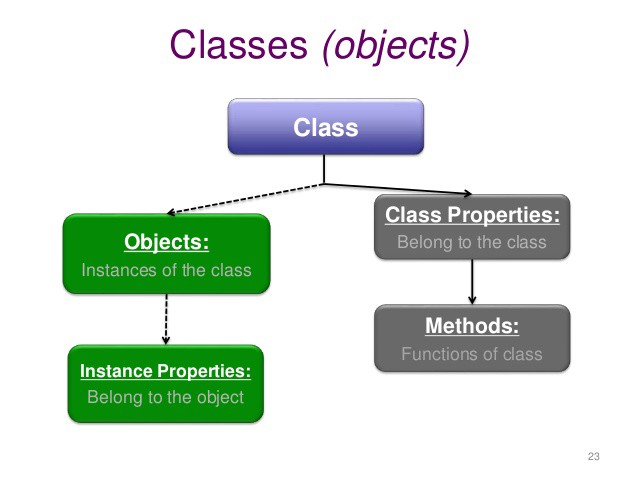

In [16]:
# 
L = ['a', 'b', 'c'] # Define an object 'L'
print(L)
L.append('d') # Call the function 'append' which belongs to L
print(L)


['a', 'b', 'c']
['a', 'b', 'c', 'd']
Is integer False
Is integer True
Arr max 1.0
<function f at 0x000002265A4430D0>


In [ ]:
x = 10.5 # Define a float object 'x'
y = 11.
print('Is integer', x.is_integer()) # Call the function 'is_integer' which belongs to x
print('Is integer', y.is_integer()) # Call the function 'is_integer' which belongs to y

In [ ]:
np_arr = np.ones(10) # Define an array
print('Arr max', np_arr.max())

def f(x): # define a function object called f
    return x+1

print(f)

In [17]:
print(type(L), type(x), type(np_arr), type(f))

<class 'list'> <class 'float'> <class 'numpy.ndarray'> <class 'function'>


# Exercise 0:
Check out the types of various quantities we've encountered in the last couple weeks. Try to find something that isn't an object!

Here are some ideas:

- integers, booleans, strings
- numpy (`np`), matplotlib.pyplot (`plt`)
- `np.asarray`, `np.ones`
- dictionaries
- `zip`
- `range`

In [11]:
# print(type(...))
print(type(dict()))

<class 'dict'>


# 2. Objects are defined by their attributes
Consider an axis object. We can modify the object by modifying its attributes.

For example, given an empty axis we can modify it in the following ways:

1. We can add data
2. We can change axis labels
3. We can rescale the axes.



<class 'matplotlib.axes._subplots.AxesSubplot'>


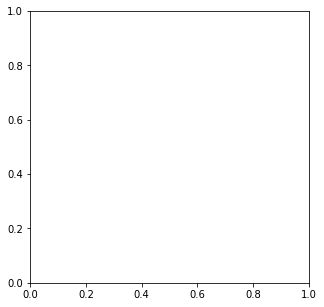

In [21]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
print(type(ax))

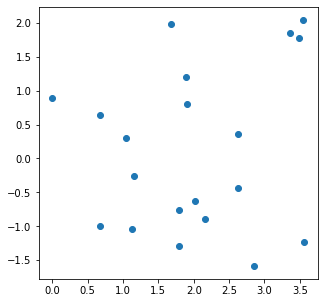

In [23]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

# 1: we can add data
ax.scatter(np.random.randn(20)+2, np.random.randn(20)+0) 



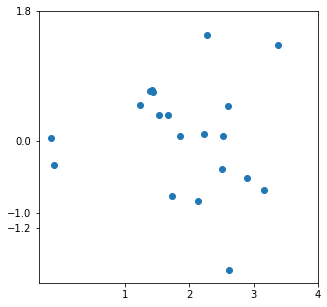

In [24]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

# 1: we can add data
ax.scatter(np.random.randn(20)+2, np.random.randn(20)+0) 

# 2: we can change axis ticks/labels
ax.set_xticks([1, 2, 3, 4]);
ax.set_yticks([-1, -1.2, 0, 1.8]);


(-0.3062134455070965, 4.0)


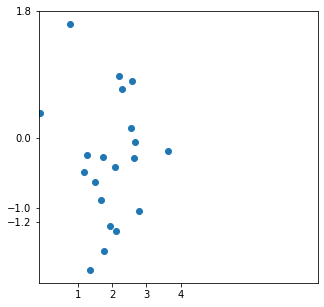

In [25]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

# 1: we can add data
ax.scatter(np.random.randn(20)+2, np.random.randn(20)+0) 

# 2: we can change axis ticks/labels
ax.set_xticks([1, 2, 3, 4])
ax.set_yticks([-1, -1.2, 0, 1.8])

# 3: we can rescale the axis
# Note: we can also `get` methods
xlimits = ax.get_xlim()
print(xlimits)

new_xlimits = (0.5*xlimits[0], 2*xlimits[1])

ax.set_xlim(new_xlimits[0], new_xlimits[1]);

Each one of these modifications was done to the `axis` object named `ax`. (`ax` is just a name!). And each of these is a function! I.e. everything we did had the form `ax.function()` with parentheses. What they do (in the case of the `.set_X()` functions) is change `ax` in place (remember the `inplace` argument in several pandas functions!).

If we wanted to explicitly rewrite the functions above ourselves, we would probably start like this:

In [27]:
# ax.scatter(xdata, ydata)
def scatter(xdata, ydata):
    # Add dots to ax at all points in (xdata, ydata)
    return 
        
def set_xticks(listofxticks):
    # Change the xticks of ax
    return

# etc...

# Wait a minute!

How are they supposed to know _where_ to change the xticks, or draw the scatter?

We need to somehow tell the function what to modify, which has to be done by providing an argument:

In [28]:
def scatter(whateverisbeforetheperiod, xdata, ydata):
    # Add dots to whateverisbeforetheperiod (here, ax) at all points in (xdata, ydata)
    return
    
def set_xticks(whateverisbeforetheperiod, listofxticks):
    # Change the xticks of whateverisbeforetheperiod (here, ax)
    return

### > Objects are defined by their attributes (and their `self`)

The point mentioned above is done in python with `self`, so that functions are defined in the following way. It's called self because the functions "belong" to the object before the `.`, so any modifications should be done to the object itself.

In [29]:
def scatter(self, xdata, ydata):
    # Add dots to whatever is before the period (="self" (ax in our case)) at all points in (xdata, ydata)
    return
    
def set_xticks(self, listofxticks):
    # Change the xticks of whatever is before the period (= "self" (ax in our case))
    return

In [30]:
L = ['a', 'b', 'c']

L.append('d') # Instance L uses the .append method, which is shared by all lists
print(L)

['a', 'b', 'c', 'd']


In [31]:
L = ['a', 'b', 'c'] # Instance

list.append(L, 'd') # Class method explicitly called

print(L)

['a', 'b', 'c', 'd']


# 3. Let's put this into practice by defining our own class!
Objects can be defined using classes. Each of the objects we referenced above above is really an instance (realization) of a class

In [32]:
print(type(L), type(x), type(np_arr), type(ax))

<class 'list'> <class 'float'> <class 'numpy.ndarray'> <class 'matplotlib.axes._subplots.AxesSubplot'>


We see that the objects which are stored in our variables `L`, `x`, and `np_arr` are instances of the `list`, `float` and `numpy.ndarray` classes, respectively.  

#### To make our own class, we need to do two things:
1. Define how to instantiate it, i.e. specify how it should be made
    - This is done using a function called `__init__()`. This function name is _reserved_ for this specific purpose, and you can't use an `__init__` function to do anything else.
 
 
2. Define any properties we want it to have using attributes
    - This is done by defining functions and objects which are bound to the class using the `self.` prefix


We'll get a feel for these by defining classes for animals. Let's start with the best animal, dogs. First we need to define a class, much like we define a function:

In [33]:
class Dog(object): 
    pass # This just means do nothing

Let's decompose this. The first line `class Dog(object):` looks similar to the `def fct(x)` notation used to define functions, but it isn't quite a function. In particular, it doesn't have inputs and outputs as a normal function. The argument (here `object`) specifies the "parent" class of our new class. Since everything in python is an object, we will just use object here. **You'll always be safe using `object`!**
(We will not discuss parent and children classes, which is called class inheritance. I'll put some links below). 

Just as `def` is used to define a new function with name `fct`, `class` is used to define a new class with name `Dog`. **In both cases, everything following must be indented!** 



In [34]:
d = Dog()
print(type(d))

<class '__main__.Dog'>


In [38]:
L = list()
print(type(L))

<class 'list'>
<class 'dict'>


In [ ]:
D = dict()
print(type(D))

## 3.2 Defining object instantiation using `__init__`
Ok, so we've made a Dog class, what now? It doesn't throw an error, but it also can't do anything. Every dog should have a name, so let's add an `__init__` function to determine how to instantiate our dog with a name.

In [39]:
class Dog(object):
    def __init__(self, dog_name):
        print('Naming dog', dog_name)
        return None

In [40]:
d = Dog('Fredo')
print(type(d))

Naming dog Fredo
<class '__main__.Dog'>


Again, let's stop and decompose the next two lines.

 - `def __init__():` is an actual function. It takes an input, and uses it to assign properties to the new object, which is `self`. When we create a dog, we want to give it a name, hence I've put an additional argument `dog_name` which we will use shortly. 
 - **Note: __init__ always must return either nothing, or `None`. This is because the "output" of the function must be the new class instance you are making** (you can try having it return something, but will get an error)`


In [41]:
class Dog(object):
    def __init__(self, dog_name):
        print('Naming dog', dog_name)
        return None
    
    def other_function(self):
        pass

In [45]:
# Example of why __init__ can't return anything
class Dog(object):
    def __init__(self, dog_name):
        print('Naming dog ', dog_name)
        return 10

d = Dog('Fredo')
print(type(d))

Naming dog  Fredo


TypeError: __init__() should return None, not 'int'

# Exercise 1:
Just to get used to the syntax, make a class called `NewClass`. When you instantiate this class, pass two numbers as arguments. In `__init__`, print the sum of the numbers.

Do the same sanity checks that I did above (i.e. make sure you can instantiate your class)

In [46]:
# Pseudocode

# Header making a new class called NewClass
#     __init__ function: what arguments do you need?
#         write bulk of __init__ function


In [13]:
# Make sure the code works!

nc = NewClass(16, 7.2) # Should print 23.2
print(type(nc)) # Should be '__main__.NewClass'

NameError: name 'NewClass' is not defined

# BREAK

# 4. The use of `self` to reference class instances
Now I want to stop to talk about the concept of 'self'. Philosophers have much to say on this subject, we have much less to say. For us, `self` is always used to refer to a single object, in particular it's used to prevent us from referencing the class as a whole.

### Self as an argument:

   - Before, we used `self` as the first argument in the `__init__` function. 
   - `self` is used in the definition of **every** class function as the first argument (`__init__` is just a class function, like any other function)
   - When used as a function argument, `self` refers to whatever is in front of the `.`
   
   
### Next, we'll make a few different class functions to see how this works. 

In [47]:
class Dog(object):
    def __init__(self, dogname):
        print('Name is', dogname)
        return
    
    def set_name(self, dogname):
        print('Name is now', dogname)
        return
    
    def set_name_wrong(dogname):
        print('Name is now', dogname)
        return

In [48]:
d = Dog('George') # This is the __init__ function in disguise

Name is George


In [49]:
d.set_name('Fredo')

Name is now Fredo


In [50]:
d.set_name_wrong('Harold') # `d.` notation implicitly passes `d` to whatever comes after `.`

TypeError: set_name_wrong() takes 1 positional argument but 2 were given

### Self as a reference to an instance (single object):
   - `self.` is used with the dot notation to specify things that belong to one instance of the class.   
        - We have seen this already with `arr.shape` for numpy arrays. `shape` is an attribute of `arr`.

We can use this to store attributes!

In our previous example, we didn't actually assign the name of the dog, we just printed it. Let's assign it:

In [51]:
class Dog(object):
    def __init__(self, dogname):
        print('{} is born!'.format(dogname))
        
        # Define a new attribute
        self.dogs_name = dogname # This assigns the argument dogname to the INSTANCE ATTRIBUTE "dogs_full_name"
        self.dogs_height = 10
        return


In [52]:
d = Dog('George')


George is born!


In [53]:
print(d.dogs_name)
print(d.dogs_height)

George
10


In [57]:
class Dog(object):
    def __init__(self, dogname):
        print('{} is born!'.format(dogname))
        
        # Define a new attribute
        self.dogs_name = dogname
        self.dogs_height = 10
        return
    
    def set_name(self, dogname):
        self.dogs_name = dogname
        print('Name is now ', dogname)
        return
    
    def grow(self, growth):
        newheight = self.dogs_height + growth
        self.dogs_height = newheight
        return
    
    def print_name(self):
        print(self.dogs_name)
        return

In [58]:
d = Dog('George')

George is born!


In [59]:
d.set_name('Fredo')
print(d.dogs_name)

Name is now  Fredo
Fredo


In [60]:
d1 = Dog('Fredo')
d2 = Dog('Oderf')

print(d1.dogs_name)
print(d2.dogs_name)

# Note that using self. keeps the names separate. 
# If this seems painfully obvious, then that means the language was constructed properly :)

Fredo is born!
Oderf is born!
Fredo
Oderf


# Exercise 2: Debug this class!

In [69]:
class Cat(object):
    def __init__(self, name, color):
        self.name = name
        self.color = color
        return 
        
    def rename(self, new_name):
        name = new_name
        return

    def recolor(new_color):
        self.color = new_color
        return
    
    

In [70]:
c = Cat('Foo', 'ochre')
print(c.name, c.color)

c.rename('Bar')
print(c.name) # Should return 'Bar'

c.recolor('red')
print(c.color) # Should return 'red'

Foo ochre
Foo


TypeError: recolor() takes 1 positional argument but 2 were given

## 4.2 Class functions can also return things

We are familiar with this from methods like `arr.max()` in numpy, where the maximum is returned. __Mini exercise: why do you think the writers of numpy made max a function, and not an attribute?__

Let's expand our dog to include a list of all its previous names. We can then make a function which returns the previous name.

In [61]:
class Dog(object):
    def __init__(self, initial_name):
        self.name_history = [] # Note I defined a new class attribute here, which is a list
        self.set_name(initial_name) # Note we can call class functions, but then we need `self.` !
        return
            
    def set_name(self, dogname):
        self.name_history.append(dogname) # Don't be afraid of several `.` in a row!
        self.name = dogname
        print('Name is now ', dogname)
        return
    
    def get_previous_name(self):
        return self.name_history[-2] # The name before last
    

In [62]:
d = Dog('Happy')
# Since .name_history is defined already in __init__, this attribute already exists!
print(d.name_history)

Name is now  Happy
['Happy']


In [63]:
d.set_name('Fredo')
d.set_name('Erwin')
d.set_name('Jupiter')

print(d.name_history)

Name is now  Fredo
Name is now  Erwin
Name is now  Jupiter
['Happy', 'Fredo', 'Erwin', 'Jupiter']


In [64]:
prev_name = d.get_previous_name()

print(prev_name)

Erwin


### Aside: did we need a class method to get the previous name?

No! We could have just as well done `d.name_history[-2]`. However, having a class method has some potential benefits.

1. It signals to people reading your code that there will be a need for the function "get previous".
2. It could be more clear than operating on attributes externally
3. It keeps the function nicely packaged together with your object

These benefits don't always outweigh the overhead of writing a class method: it's up to you how you want to code.

### Reminder: classes are nice for keeping things separate

In [65]:
dog1 = Dog('George')
dog2 = Dog('Alfredo')

dog1.set_name('Fredo')
dog2.set_name('Ivan the terrible')
dog1.set_name('Heinrich')
dog2.set_name('George')
dog1.set_name('Jupiter')

Name is now  George
Name is now  Alfredo
Name is now  Fredo
Name is now  Ivan the terrible
Name is now  Heinrich
Name is now  George
Name is now  Jupiter


In [66]:
print(dog1.name_history)
print(dog2.name_history)

['George', 'Fredo', 'Heinrich', 'Jupiter']
['Alfredo', 'Ivan the terrible', 'George']


# Exercise 3 (for now): 

Fill in the following to give your dog a weight attribute 

# Exercise (as homework): 

Make a Doge class. In addition to the usual dog attributes, give the class a dogecoin_wallet attribute. Create buy/sell methods to add/remove dogecoins to your dog's wallet. 

If you would like an additional challenge, add methods to track the history of your dog's wallet, or to account for the varying value of Dogecoins, for example with an `update_value` method which "looks up" the value of Dogecoin for the day (could be a random number) and adjusts the total value of the wallet (which is (coin value)*(number of coins)


In [ ]:
class Dog(object):
    def __init__(self, initial_name, initial_weight):
        self.name_history = [] # Note I defined a new class attribute here, which is a list
        self.weight_history = #
        
        # FILL IN:
        # Set an initial name at 'birth' (initialization) of the dog
        # Set an initial weight at 'birth' (initialization) of the dog
        
        self.is_overweight = False # Boolean attribute! Lets say the dog is overweight if it weighs more than 20kg. 
        
        return
    
    def set_name(self, dogname):
        self.name_history.append(dogname) # Don't be afraid of several `.` in a row!
        
        self.name = dogname
        print('Name is now ', dogname)
        return
    
    def gain_weight(# Fill this in. Argument should include an amount of weight which the dog will gain)
        # Fill this in so that the dog's weight increases by the amount passed to the function
        # Don't forget to update the dog's weight as well as the weight history!
        
        # Make sure to test if the dog is overweight, and update the self.is_overweight attribute accordingly!
        

    

In [ ]:
## Tests:

d = Dog('Horowitz', 10.5)

print(d.name, d.weight) # Should print name and weight

d.set_name('Richter')
d.set_name('Rubinstein')

d.gain_weight(1) # gain 1kg
d.gain_weight(1.3) # gain 1.3kg

print(d.weight) # Should be 10.5+1+1.3=12.8
print(d.weight_history) # Should return [10.5, 11.5, 12.8]
print(d.is_overweight) # Should return 'False'

d.gain_weight(10) # gain 10kg
print(d.is_overweight) # Should return 'True'

### Brief aside: the special `__getitem__` function

`__getitem__` tells your class how to respond when you try to use square brackets with it `[]`. 

In [67]:
class Dog(object):
    def __init__(self, initial_name):
        self.name_history = [] # Note I defined a new class attribute here, which is a list
        self.set_name(initial_name) # Note we can call class functions, but then we need `self.` !
        return
            
    def set_name(self, dogname):
        self.name_history.append(dogname) # Don't be afraid of several `.` in a row!
        self.name = dogname
        print('Name is now', dogname)
        return
    
    def __getitem__(self, idx):
        return self.name_history[idx] 
    

In [68]:
dog = Dog('George')

dog.set_name('Fredo')
dog.set_name('Heinrich')
dog.set_name('Jupiter')

Name is now George
Name is now Fredo
Name is now Heinrich
Name is now Jupiter


In [70]:
dog[2]

'Heinrich'

#### Getitem example 2

In [71]:
# We can also make a class that just draws a random number when you call getitem 
#
class randomgetitem(object):
    def __init__(self):
        return
    def __getitem__(self, index):
        return [index, np.random.randn()]

In [72]:
r = randomgetitem() # Initialize class
r[100]

[100, -0.5456829039294033]

#### Final example with a list

In [73]:
L = ['a', 'b', 'c']

In [74]:
L[1]

'b'

In [78]:
list.__getitem__(L, 1)
# You will never want to do this

'b'

# BREAK

# 5. Dogs are great, but seldom arise in scientific problems. Let's make a more realistic class to do a simulation


![SegmentLocal](v11QMZ.gif "segment")

We want to simulate one of these grains of pollen floating around in water. These undergo Brownian motion, which is  completely random motion. The particle will have various attributes such as position and statistical quantities.

In [76]:
class Brownian_Particle(object):
    def __init__(self):
        self.position = np.array([0.,0.])
        self.history = []
        
    def forward_step(self):
        new_position = self.position + np.random.randn(2)
        # Code here
        
    def simulate(self, n_steps):
        # Code here
        
    def __getitem__(self, idx):
        return self.history[idx]
        

### (10 minutes later)...

In [12]:
class Brownian_Particle(object):
    def __init__(self):
        self.position = np.array([0.,0.])
        self.history = []
        
    def forward_step(self):
        new_position = self.position + np.random.randn(2)
        self.history.append( new_position )
        self.position = new_position
        return
        
    def simulate(self, n_steps):
        for step in range(n_steps):
            self.forward_step() # self. !!
        return
    
    def x_coords(self):
        x_positions = np.asarray(self.history)[:, 0]
        return x_positions
    
    def y_coords(self):
        x_positions = np.asarray(self.history)[:, 1]
        return x_positions
    
    def mean(self):
        avg_position = np.mean( np.asarray(self.history), axis=0)
        return avg_position
    
    #def save(self, save_to_path='./simulation.npy'):
    #    np.save(save_to_path, np.asarray(self.history))
        
    def distances_from_mean(self):
        x_positions = self.x_coords() - self.mean()[0]
        y_positions = self.y_coords() - self.mean()[1]
        
        r_distances = np.sqrt( x_positions**2 + y_positions**2 )   
        return r_distances
    
    def points_far_away(self, distance): # How often are we a `distance` away from the mean?
        
        r_distances = self.distances_from_mean()
        indices_far_away = r_distances > distance
        
        frequency = sum(indices_far_away)/len(self.history)
        
        return frequency, indices_far_away
    
    def __getitem__(self, idx):
        return self.history[idx]
        
        

In [13]:
bp = Brownian_Particle()


In [14]:
bp.forward_step()
print('First position', bp.position)


First position [-0.05268812  0.5872328 ]


In [15]:
bp.simulate(50000)

print('Last position', bp.position)
print('History', np.asarray(bp.history))

Last position [-98.56807758  34.37595377]
History [[-5.26881184e-02  5.87232802e-01]
 [-6.92614988e-01  2.08403361e+00]
 [-7.85806680e-01  1.79478099e+00]
 ...
 [-1.01242360e+02  3.42747753e+01]
 [-9.91853584e+01  3.53267663e+01]
 [-9.85680776e+01  3.43759538e+01]]


In [16]:
print(bp[0])
print(bp[2])


[-0.05268812  0.5872328 ]
[-0.78580668  1.79478099]


75.39% of points are far away from the mean


(-213.66704760403718,
 83.50415883066326,
 -165.85061363418725,
 132.84923163974116)

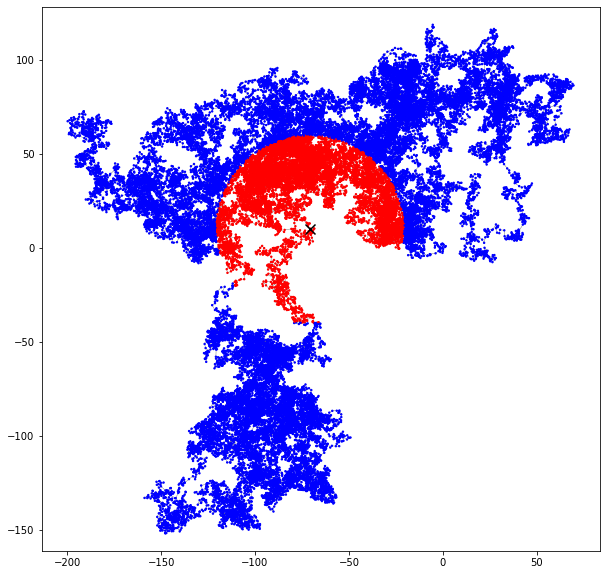

In [33]:
freq, points_far_away = bp.points_far_away(50)

print('{:.2f}% of points are far away from the mean'.format(freq*100))

points_far_bool = points_far_away.astype(int) # Boolean array of whether points are far away or not
color_choices = np.asarray([[1,0,0], [0,0,1]]) # List of two colors in RGB, ['red', 'blue']
colors = color_choices[points_far_bool] # Maps 1 (true=far away) to blue, 0 (false) to red

fig,ax=plt.subplots(1,1,figsize=(10,10))

# Use our convenient x_coords, y_coords functions to plot a curve connecting all the pionts
ax.plot(bp.x_coords(), bp.y_coords(), color='gray', lw=0.5) 

# Use our convenient x_coords, y_coords functions to plot a scatter over the curve
ax.scatter(bp.x_coords(), bp.y_coords(), color=colors, s=2, zorder=100)

# Plot an x at the mean position
ax.scatter(bp.mean()[0], bp.mean()[1], color='k', marker='x', s=100, zorder=200)

ax.axis('equal')

# 6. Properly storing your classes

Best practice: clean up after yourself, put your classes away (into modules!)

In [34]:
from BPmodule import Brownian_Particle


In [6]:
bp = Brownian_Particle()

bp.forward_step()
print('First position', bp.position)

bp.simulate(10000)

print('Last position', bp.position)
print('History', np.asarray(bp.history))

First position [-0.12729324 -1.31786541]
Last position [-26.4035848    4.48933698]
History [[ -0.12729324  -1.31786541]
 [ -2.04483329   1.61728226]
 [ -2.54897025   1.2885665 ]
 ...
 [-27.13352151   4.97238077]
 [-27.27303013   4.75267744]
 [-26.4035848    4.48933698]]


# 7. Additional functions for classes
Using `dir()` to check out attributes of a class

In [90]:
arr = np.arange(10)

print(np.asarray(dir(arr)))

['T' '__abs__' '__add__' '__and__' '__array__' '__array_finalize__'
 '__array_function__' '__array_interface__' '__array_prepare__'
 '__array_priority__' '__array_struct__' '__array_ufunc__'
 '__array_wrap__' '__bool__' '__class__' '__complex__' '__contains__'
 '__copy__' '__deepcopy__' '__delattr__' '__delitem__' '__dir__'
 '__divmod__' '__doc__' '__eq__' '__float__' '__floordiv__' '__format__'
 '__ge__' '__getattribute__' '__getitem__' '__gt__' '__hash__' '__iadd__'
 '__iand__' '__ifloordiv__' '__ilshift__' '__imatmul__' '__imod__'
 '__imul__' '__index__' '__init__' '__init_subclass__' '__int__'
 '__invert__' '__ior__' '__ipow__' '__irshift__' '__isub__' '__iter__'
 '__itruediv__' '__ixor__' '__le__' '__len__' '__lshift__' '__lt__'
 '__matmul__' '__mod__' '__mul__' '__ne__' '__neg__' '__new__' '__or__'
 '__pos__' '__pow__' '__radd__' '__rand__' '__rdivmod__' '__reduce__'
 '__reduce_ex__' '__repr__' '__rfloordiv__' '__rlshift__' '__rmatmul__'
 '__rmod__' '__rmul__' '__ror__' '__rpow__

### What are the weird `__x__` attributes?

Anything in python with two underscores is special, and you should generally avoid touching them unless you need to. For example, many of the methods above tell python how to "overload" operators such as `[]`, `+`, `-` etc. They also take care of important information such as how to respond when you call builtin functions such as `len()` (given by the `__len__()` function).

(see https://docs.python.org/3/reference/datamodel.html section 3.3 for more)

In [91]:
print(arr.__getitem__(8)) # Gets the 8th item
print(arr[8]) # Gets the 8th item (by secretly calling __getitem__)

print(arr.__add__(6.2)) # Adds the argument 6.2 to the array
print(arr + 6.2) # Does the same, but by secretly calling __add__

print(arr.__neg__()) # Takes the negative of the array
print(-arr) # Same

8
8
[ 6.2  7.2  8.2  9.2 10.2 11.2 12.2 13.2 14.2 15.2]
[ 6.2  7.2  8.2  9.2 10.2 11.2 12.2 13.2 14.2 15.2]
[ 0 -1 -2 -3 -4 -5 -6 -7 -8 -9]
[ 0 -1 -2 -3 -4 -5 -6 -7 -8 -9]


## We can do the same for our class!

In [92]:
print(dir(bp))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'distances_from_mean', 'forward_step', 'history', 'mean', 'points_far_away', 'position', 'simulate', 'x_coords', 'y_coords']


### You can also use the __dict__ function for the current state of the class object 
(I have never actually used this, best practice is to just directly reference the attributes via `bp.attribute`)

In [93]:
bp = Brownian_Particle()

bp.forward_step()
print(bp.position)

bp.simulate(10)

print(bp.__dict__) 


[-0.06573014  0.42022605]
{'position': array([4.04570994, 3.93243918]), 'history': [array([-0.06573014,  0.42022605]), array([0.66118403, 0.90806629]), array([0.84555998, 0.90363816]), array([2.33127015, 1.0564809 ]), array([1.94111577, 4.38837509]), array([2.10806909, 2.60541296]), array([2.71738677, 1.86386141]), array([3.31334922, 2.5859664 ]), array([4.32611054, 4.0571745 ]), array([4.34190542, 4.70642445]), array([4.04570994, 3.93243918])]}


# Conclusion

Today we went over classes and objects. The main things I want you to take away from today are:

1. A better understanding of what's going on under the hood of python objects, including your favorite packages like numpy
2. Classes
    - How to initialize with `__init__`
    - Defining class methods and attributes
    - Familiarity with syntax of `self` (first argument in every function, precedes every attribute)
    - When classes might be useful
3. Even if you wouldn't be able to _produce_ a class, I hope that you have at least the background now to not be scared when you come across classes in the wild (such as on Stack Overflow, github, etc.)



# Course conclusion

We covered a lot in the last three weeks. You hopefully have now a basic understanding of the python toolkit frequently used for data analysis (numpy, pandas, etc.) and visualization (matplotlib, seaborn). 

In addition, we've touched on some "pure" programming in python, such as variable/function/class definitions, as well as brief illustrations of how to write and import `.py` files. Although the vocabulary may change, these are all essential to understanding the "grammar" of programming languages, and once learned are very transferable to other languages.

Just like any language you learn, programming languages get rusty when not used! To push the analogy further, you can only learn so much by learning a language in the classroom, the real learning starts when you have to use the language yourself out in the real world. These both hold true for programming languages, and we encourage you to try to use and expand your new toolset in your life and research. Think of coding projects for fun, and use python in your research whenever you can!

When coding on your own, you will become very familiar with the documentation and with StackOverflow, which is where you will find solutions to most of your problems. We won't post links here, it's usually easier to just google:

`numpy <FUNCTIONNAME>`

if you're having an issue with a function called FUNCTIONNAME in numpy (of course for pandas, seaborn, matplotlib, etc. just replace "numpy").

If you want to delve deeper into python's innards, you can check out this tutorial: https://docs.python.org/3/tutorial/index.html. Beware! This is targeted toward real coders (not scientists who code), so it may be difficult to understand sometimes. In the future it will serve as a good reference when you want to learn more about the tools you're using.  



# Supplementary: Inheritance

Here are a couple links: https://docs.python.org/3/tutorial/classes.html#inheritance, https://www.w3schools.com/python/python_inheritance.asp, https://realpython.com/inheritance-composition-python/, which discuss inheritance.

Inheritance lets you define subclasses, which inherit all of the methods and attributes from classes, but can be extended to have their own properties.

Just as every square is a rectangle (but not vice versa), every subclass is an instance of class (but not vice versa). For a more thorough overview, see the links above and feel free to contact me, Amanda, or Buduka on Slack in case of any questions.

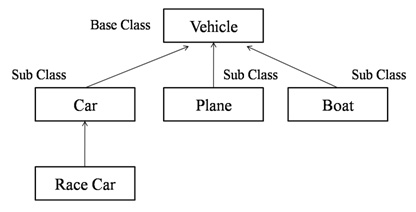

The code below is not meant to be a clear explanation of inheritance, but it does provide an example you can refer to when going through the resources above. Honestly, you probably won't need to worry about class inheritance for a long time (if at all).

In [68]:
class Dog(object):
    def __init__(self, initial_name):
        self.name_history = [] # Note I defined a new class attribute here, which is a list
        self.set_name(initial_name) # Note we can call class functions, but then we need `self.` !
        return
            
    def set_name(self, dogname):
        self.name_history.append(dogname) # Don't be afraid of several `.` in a row!
        self.name = dogname
        print('Name is now', dogname)
        return
    
    def weigh_dog(self):
        return np.random.randn() + 10 # Just return some random "weight"
    
    def __getitem__(self, index):
        return self.name_history[index] 
    

In [69]:
# Poodle as dog subclass
class Poodle(Dog):
    # We can define new functions and attributes for our subclass
    def poodle_fur(self):
        print("This dog has curly fur")
        return
    
    # We can also override original Dog functions
    def __getitem__(self, index):
        print("We are getting the poodle name")
        return self.name_history[index] # <---- Note we didn't actually define name history for poodles! They inherit it from Dog
    
    
    # We can also use any functions defined for Dogs
    def set_name(self, dogname): # This function will be specific to poodles
        super().set_name(dogname) # Here we say we want to use the parent's set_name with 'super'
        print("But the dog we named is a poodle")
        return

In [70]:
p = Poodle('George')
# This calls Dog.__init__(), since we didn't overwrite the function in Poodle
# Then in the line self.set_name (see below), since "self" is a poodle, self.set_name calls Poodle's set_name

#def __init__(self, initial_name):
#        self.name_history = []
#        self.set_name(initial_name)
#        return

# Inside Poodle's set_name, we Dog's set_name and also print an additional line

Name is now George
But the dog we named is a poodle


In [71]:
p.set_name('Ivan') # This will call Poodle's set_name
p.set_name('Vlad') # ditto

Name is now Ivan
But the dog we named is a poodle
Name is now Vlad
But the dog we named is a poodle


In [72]:
p.weigh_dog() # This will call Dog's weigh_dog, since Poodle has all of Dog's functions as well

11.342079263321128

In [73]:
p[2]

We are getting the poodle name


'Vlad'

In [74]:
p.poodle_fur()

This dog has curly fur


# Solutions

In [76]:
# Exercise 1

class NewClass(object):
    def __init__(self, num1, num2):
        print(num1+num2)
        return
    
nc = NewClass(16, 7.2)
print(type(nc))

23.2
<class '__main__.NewClass'>


In [79]:
# Exercise 2

class Cat(object):
    def __init__(self, name, color):
        self.name = name
        self.color = color
        return 
        
    def rename(self, new_name):
        self.name = new_name # <- added self. here
        return

    def recolor(self, new_color): # <-- added self here
        self.color = new_color
        return
    
    
c = Cat('Foo', 'ochre')
print(c.name, c.color)

c.rename('Bar')
print(c.name) # Should return 'Bar'

c.recolor('red')
print(c.color) # Should return 'red'

Foo ochre
Bar
red


In [83]:
class Dog(object):
    def __init__(self, initial_name, initial_weight):
        self.name_history = [] # Note I defined a new class attribute here, which is a list
        self.weight_history = []
        
        self.name = initial_name
        self.name_history.append(self.name)
        self.weight = initial_weight
        self.weight_history.append(self.weight)
        
        self.is_overweight = False # Boolean attribute! Lets say the dog is overweight if it weighs more than 20kg. 
        
        return
    
    def set_name(self, dogname):
        self.name_history.append(dogname) # Don't be afraid of several `.` in a row!
        
        self.name = dogname
        print('Name is now ', dogname)
        return
    
    def gain_weight(self, weight_kg):# Fill this in. Argument should include an amount of weight which the dog will gain)
        self.weight += weight_kg
        self.weight_history.append(self.weight)
        
        if self.weight > 20:
            self.is_overweight = True
            
        return 

## Tests:

d = Dog('Horowitz', 10.5)

print(d.name, d.weight) # Should print name and weight

d.set_name('Richter')
d.set_name('Rubinstein')

d.gain_weight(1) # gain 1kg
d.gain_weight(1.3) # gain 1.3kg

print(d.weight) # Should be 10.5+1+1.3=12.8
print(d.weight_history) # Should return [10.5, 11.5, 12.8]
print(d.is_overweight) # Should return 'False'

d.gain_weight(10) # gain 10kg
print(d.is_overweight) # Should return 'True'

Horowitz 10.5
Name is now  Richter
Name is now  Rubinstein
12.8
[10.5, 11.5, 12.8]
False
True
